## Data cleaning and exploration for FIFA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fifa = pd.read_excel(r'./fifa_data-2.xlsx')

In [6]:
fifa.shape

(18207, 62)

In [9]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Column1                   18207 non-null  object
 1   ID                        18207 non-null  object
 2   Name                      18207 non-null  object
 3   Age                       18207 non-null  object
 4   Photo                     18207 non-null  object
 5   Nationality               18207 non-null  object
 6   Flag                      18207 non-null  object
 7   Overall                   18207 non-null  object
 8   Potential                 18207 non-null  object
 9   Club                      17966 non-null  object
 10  Club Logo                 18207 non-null  object
 11  Wage                      17966 non-null  object
 12  Special                   18207 non-null  object
 13  Preferred Foot            18159 non-null  object
 14  International Reputati

In [11]:
fifa = pd.read_excel(r'./fifa_data-2.xlsx', skiprows=1)

In [19]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Column1                   18206 non-null  int64         
 1   ID                        18206 non-null  int64         
 2   Name                      18206 non-null  object        
 3   Age                       18206 non-null  int64         
 4   Photo                     18206 non-null  object        
 5   Nationality               18206 non-null  object        
 6   Flag                      18206 non-null  object        
 7   Overall                   18206 non-null  int64         
 8   Potential                 18206 non-null  int64         
 9   Club                      17965 non-null  object        
 10  Club Logo                 18206 non-null  object        
 11  Wage                      17965 non-null  object        
 12  Special           

### Data cleaning

In [21]:
fifa.isnull()

,Column1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
fifa.isna().sum()

Column1              0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 62, dtype: int64

In [31]:
fifa.isna().sum()[:50]

Column1                         0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Wage                          241
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16942
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccurac

In [35]:
fifa['Wage'].str.replace('K', '000')

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18201      1000
18202      1000
18203      1000
18204      1000
18205      1000
Name: Wage, Length: 18206, dtype: object

In [ ]:
fifa['Wage'] = fifa['Wage'].str.replace('K', '000').astype(float)

In [40]:
fifa['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18201      1000.0
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
Name: Wage, Length: 18206, dtype: float64

In [ ]:
fifa['Weight'] = fifa['Weight'].str.replace('lbs', '').astype(float)

In [46]:
fifa['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18201    134.0
18202    170.0
18203    148.0
18204    154.0
18205    176.0
Name: Weight, Length: 18206, dtype: float64

In [48]:
fifa.describe()

,Column1,ID,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000,17965.000000,18206.000000,18158.000000,18158.000000,18158.000000,...,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000
mean,9103.499341,214300.085576,25.121828,66.237394,71.306273,9855.441136,1597.790783,1.113118,2.947296,2.361328,...,48.548519,58.646988,47.279271,47.695561,45.659048,16.616808,16.392059,16.232129,16.389525,16.710981
std,5255.764977,29965.139973,4.669793,6.906874,6.135100,22101.199376,272.581286,0.393793,0.660474,0.756180,...,15.704482,11.435135,19.902420,21.662432,21.287291,17.695661,16.907251,16.503316,17.034929,17.955609
min,0.000000,16.000000,16.000000,46.000000,48.000000,1000.000000,731.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4552.250000,200316.500000,21.000000,62.000000,67.000000,1000.000000,1457.000000,1.000000,3.000000,2.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.500000,221759.500000,25.000000,66.000000,71.000000,3000.000000,1635.000000,1.000000,3.000000,2.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.750000,236529.750000,28.000000,71.000000,75.000000,9000.000000,1786.750000,1.000000,3.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,565000.000000,2346.000000,5.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


### Fill empty wages with mean (average) wage

In [49]:
meanWage = fifa['Wage'].mean()
fifa['Wage'].fillna(meanWage, inplace=True)

In [51]:
fifa['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18201      1000.0
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
Name: Wage, Length: 18206, dtype: float64

In [57]:
fifa['Wage'].isna().sum()

0

In [59]:
fifa_2 = fifa[['Name', 'Potential', 'Age', 'Overall', 'Wage', 'Weight', 'SprintSpeed']]

In [61]:
fifa_2.head()

,Name,Potential,Age,Overall,Wage,Weight,SprintSpeed
0,L. Messi,94,31,94,565000.0,159.0,86.0
1,Cristiano Ronaldo,94,33,94,405000.0,183.0,91.0
2,Neymar Jr,93,26,92,290000.0,150.0,90.0
3,De Gea,93,27,91,260000.0,168.0,58.0
4,K. De Bruyne,92,27,91,355000.0,154.0,76.0


In [63]:
fifa.head()

,Column1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [64]:
fifa_2.head()

,Name,Potential,Age,Overall,Wage,Weight,SprintSpeed
0,L. Messi,94,31,94,565000.0,159.0,86.0
1,Cristiano Ronaldo,94,33,94,405000.0,183.0,91.0
2,Neymar Jr,93,26,92,290000.0,150.0,90.0
3,De Gea,93,27,91,260000.0,168.0,58.0
4,K. De Bruyne,92,27,91,355000.0,154.0,76.0


#### Target and predictor variables

Predictor variables are those whose values are used to determine the value of the target variable

We will use Potential as target

A correlation matrix shows how different values correlate with each other.
Heatmaps are a good way to visualise the correlation matrix


In [65]:
fifa_cor = fifa_2.corr()
fifa_cor

,Potential,Age,Overall,Wage,Weight,SprintSpeed
Potential,1.000000,-0.253638,0.660746,0.485943,-0.007013,0.236795
Age,-0.253638,1.000000,0.452245,0.142656,0.230196,-0.151710
Overall,0.660746,0.452245,1.000000,0.573154,0.154612,0.210674
Wage,0.485943,0.142656,0.573154,1.000000,0.065091,0.130712
Weight,-0.007013,0.230196,0.154612,0.065091,1.000000,-0.410943
SprintSpeed,0.236795,-0.151710,0.210674,0.130712,-0.410943,1.000000


<AxesSubplot:>

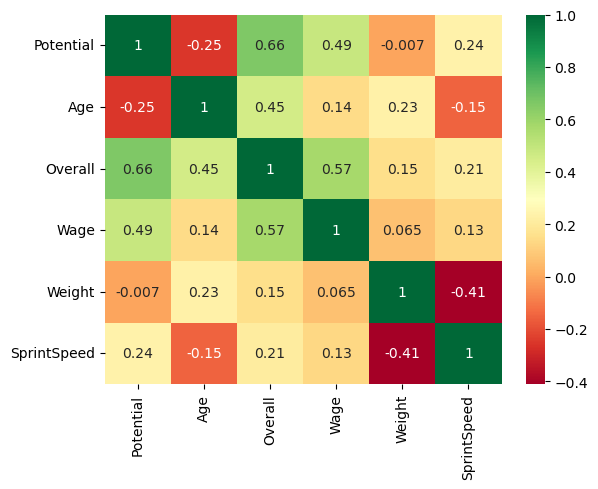

In [68]:
# using heatmap from sns
sns.heatmap(fifa_cor, annot=True, cmap='RdYlGn')

<AxesSubplot:>

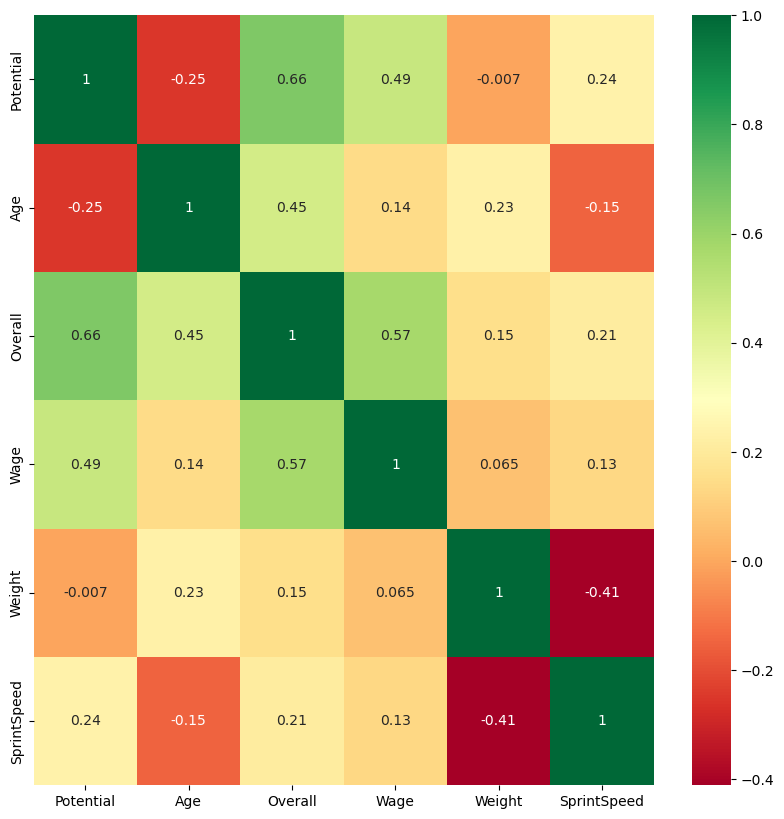

In [69]:
plt.figure(figsize=(10, 10))
sns.heatmap(fifa_cor, annot=True, cmap='RdYlGn')